In [2]:
import tensorflow as tf
from tensorflow import keras

Importación de librerias.

In [3]:
(imagenes_entrenamiento, etiquetas_entrenamiento ), (imagenes_verificacion, etiquetas_verificacion) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 69s 0us/step


Carga de conjunto de datos de imagenes para entrenamiento. 50.000 fotos en color de 32x32 pixels de aviones, trenes, autos, etc con etiquetas. 10000 fotos para testear

In [4]:
print(etiquetas_entrenamiento.shape, imagenes_entrenamiento.shape)

(50000, 1) (50000, 32, 32, 3)


In [5]:
imagenes_entrenamiento, imagenes_verificacion = imagenes_entrenamiento / 255.0, imagenes_verificacion  / 255.0

AGREGADO: Estandarizacion entre 0s y 1s

In [6]:
nombres_clases = ['airplane','automobile','bird','cat','deer',
                  'dog','frog','horse','ship','truck']

Funcion para mostrar imagenes en miniatura.

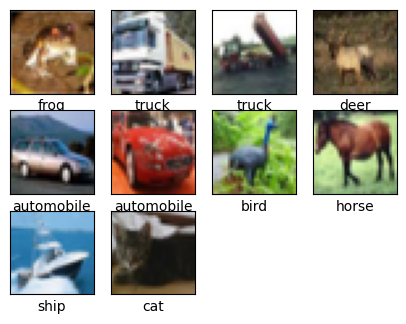

In [7]:
import matplotlib.pyplot as plt
def mostrar():
  plt.figure(figsize=(5,5))
  for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_entrenamiento[i], cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiquetas_entrenamiento[i][0]])
  plt.show()
mostrar()

Una capa de entrada para imagenes de 32x32 pixels con 3 dimensiones de colores.
Dos capas convolucionales para extraer caracteristicas, con 32 filtros de 3x3. Quitando relleno que no se ajusta.
Dos capas de agrupamiento con filtros de 2x2 para achicar la anterior.

Una capa complemtamente conectada (densa) con 64 neuronas.
Una capa de salida con 10 neuronas para clasificar.

In [8]:
capa = keras.layers
modelo = keras.models.Sequential()
modelo.add(capa.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu',
                       input_shape=(32,32,3)))
modelo.add(capa.MaxPool2D(2,2))
modelo.add(capa.Conv2D(32, 3, activation='relu' ))
modelo.add(capa.MaxPool2D(2,2))
modelo.add(capa.Flatten())

modelo.add(capa.Dense(64, activation='relu'))
modelo.add(capa.Dense(10))

modelo.summary()  #(3x3xC+1)x32 = 896 (C=Canales) 32 filtros. kernel 3x3

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,586 (330.41 KB)

 Trainable params: 84,586 (330.41 KB)

 Non-trainable params: 0 (0.00 B)

Configuracion del modelo

In [9]:
modelo.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Entrenamiento (creación del modelo)

In [10]:
modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento,
           epochs=3, batch_size=64)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3624 - loss: 1.7442
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5515 - loss: 1.2659
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6108 - loss: 1.1119


Loss se busca el número mas bajo. Accuracy el más alto

In [11]:
modelo.evaluate(imagenes_verificacion, etiquetas_verificacion,
                batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6171 - loss: 1.0872


[1.0934581756591797, 0.6133999824523926]

In [ ]:
# predict()

**CONTINUAR DESDE ACA**

In [13]:
modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=10, batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6324 - loss: 1.0438
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6577 - loss: 0.9815
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6750 - loss: 0.9285
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6905 - loss: 0.8853
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7080 - loss: 0.8346
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7196 - loss: 0.8050
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7334 - loss: 0.7703
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7422 - loss: 0.7427
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7531 - loss: 0.7124
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7617 - loss: 0.6879
